In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
raw = pd.read_csv("/content/drive/MyDrive/BOAZ_mini_prj/Brazilian_Customer.csv")

## 데이터 살펴보기

- Olist ; 쿠팡같은 이커머스 회사
- Olist에 입점한 여러 상품들의 데이터

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [ ]:
raw.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,b46f1e34512b0f4c74a72398b03ca788,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,dc90f19c2806f1abba9e72ad3c350073,5,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP


In [ ]:
raw.shape
# 39 열 117,329 행

(117329, 39)


#### 컬럼 설명

- order_id  
- customer_id  
- order_status : 주문 상태
- order_purchase_timestamp : 주문 (구매) 시간  
- order_approved_at : 결제 승인 타임스탬프를 표시합니다.  
- order_delivered_timestamp : 주문 게시 타임스탬프를 표시합니다. 물류 파트너에게 처리된 시점.  
- review_id   
- review_score  
- review_comment_title  
- review_comment_message  
- review_creation_date  
- review_answer_timestamp  
- payment_sequential : 고객은 하나 이상의 결제 수단으로 주문을 지불할 수 있습니다. 만약 그가 그렇게 한다면, 다음과 같은 순서가 만들어질 것이다. (⭐️???) 
- payment_type : 고객이 고른 결제 수단  
- payment_installments : 고객이 고른 할부 횟수  
- payment_value : 거래 가격(?) 가치(?) (⭐️???) 
- customer_unique_id  
- customer_zip_code_prefix :   
- customer_city  
- customer_state  
- order_item_id  
- product_id  
- seller_id  
- shipping_limit_date : 물류 파트너에게 주문을 처리하기 위한 판매자 발송 제한 날짜(?)  
- Price  
- freight_value : 품목 화물 가격 (주문에 품목이 두 개 이상 있는 경우 품목 간에 운임 가격이 분할됨) => 배송비 같은거인듯  
- product_catecory_name  
- product_name_length  
- product_description_length  
- product_photos_qty : 제품 게시 사진 수  
- product_weight_g : 제품의 그람(g) 수  
- product_length_cm  
- product_height_cm  
- product_width_cm  
- seller_zip_code_prefix  
- seller_city  
- seller_state  





## EDA

#### 인덱스/수치형/명목형/시간 변수 나누기

In [ ]:
# id 변수
id_col = ['order_id', 'customer_id', 'review_id', 'customer_unique_id', 'customer_zip_code_prefix',
          'order_item_id','product_id','seller_id','seller_zip_code_prefix']

# 수치형 변수
num_col = ['review_score','payment_sequential','payment_installments','payment_value',
           'price','freight_value','product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm']

# 시간형 변수
date_col = ['order_purchase_timestamp','order_approved_at','order_delivered_customer_date','review_creation_date',
            'review_answer_timestamp','shipping_limit_date','order_estimated_delivery_date',
            'order_delivered_carrier_date']

# 범주형 변수
obj_col = raw.drop(columns = num_col).drop(columns = id_col).drop(columns = date_col).columns


#### 결측치 확인

In [ ]:
# 결측치 확인 

print("< 각 열 별 결측수 >")
print()
for i in raw.columns:
    if raw[i].isnull().sum() != 0:
        print(i," : ",raw[i].isnull().sum())

< 각 열 별 결측수 >

order_approved_at  :  15
order_delivered_carrier_date  :  1235
order_delivered_customer_date  :  2471
review_comment_title  :  103437
review_comment_message  :  67650
product_category_name  :  1695
product_name_lenght  :  1695
product_description_lenght  :  1695
product_photos_qty  :  1695
product_weight_g  :  20
product_length_cm  :  20
product_height_cm  :  20
product_width_cm  :  20


review_comment_title, review_comment_message 에 많은 결측  
=> 아무래도 물건 샀다고 다 리뷰쓰는 것은 아니니..   
=> 리뷰 제목이랑 리뷰 코멘트 결측 수가 다른 건 왜일까  
</br>
✅ **우리의 분석 방향에 따라 결측처리 방법이 달라질 것 같음**

### 연속형 eda

#### 이상점 확인 (Box Plot)

<ipython-input-14-bb0db219f2ed>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


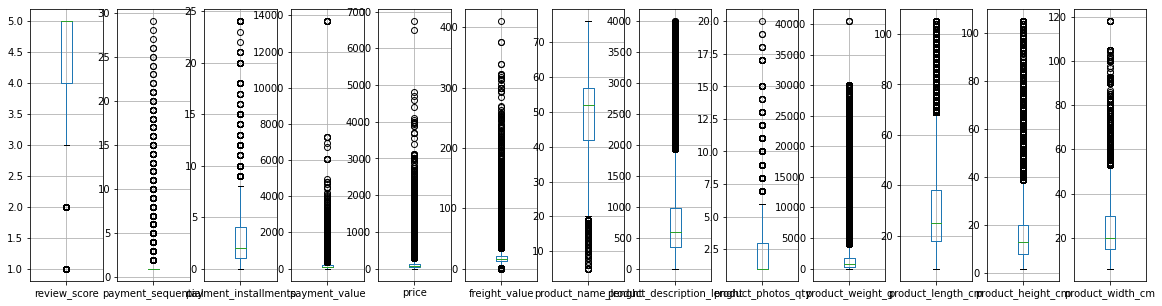

In [ ]:
col = num_col
fig, axes = plt.subplots(nrows=1, ncols=13)
for (i,j) in zip(col, range(0,13)):
    raw[num_col].boxplot(column=i, ax = axes[j])
plt.tight_layout()
fig.set_size_inches(20, 5)
plt.show()

음 review_score, payment_value 말고는 막 엄청 튀는 이상치는 없는듯.   
어차피 이상치를 무조건 제거해서 좋은 것도 아니니까 모델링 결과 보면서 review_score, payment_value도 제거할지말지 결정하면 될 것 같음.  

#### 상관관계

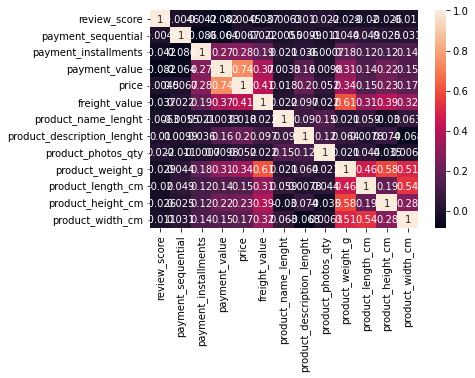

In [ ]:
sns.heatmap(raw[num_col].corr(),annot=True)
fig.set_size_inches(50, 30)
plt.show()

- payment_value - price ; 0.74 (솔직히 payment_value랑 price가 뭐가 다른지 몰게씀.. 거래가치가 뭔데 ...   
- freight_value - product_weight_g ; 0.61
- product_height_cm - product_weight_g ; 0.58
- product_width_cm - product_weight_g ; 0.51
- product_height_cm - product_width_cm ; 0.51

#### 분포

In [ ]:
num_col

['review_score',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

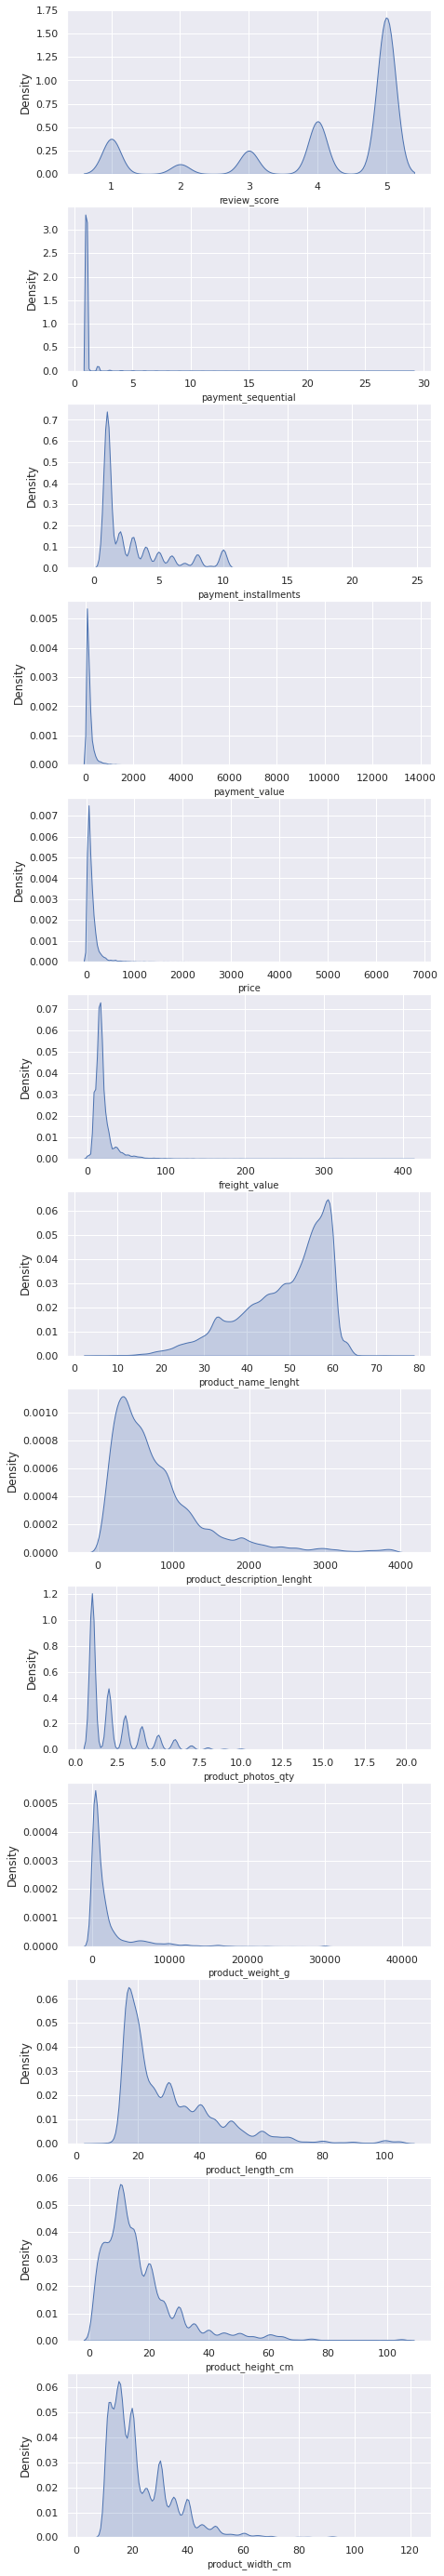

In [ ]:
sns.set(rc = {'figure.figsize':(7,50)})
fig, axes = plt.subplots(13, 1)
for i, colname in zip(range(len(num_col)), num_col):
    p = sns.kdeplot(data=raw, x = num_col[i], shade=True,ax=axes[i])
    p.set_xlabel(colname, fontsize = 10)

### 범주형 eda

In [ ]:
for i in obj_col:
    print("< ",i," >")
    print(raw[i].value_counts())
    print()
    print()

<  order_status  >
delivered      114859
shipped          1167
canceled          553
invoiced          370
processing        370
unavailable         7
approved            3
Name: order_status, dtype: int64


<  review_comment_title  >
Recomendo                 494
recomendo                 403
Bom                       331
super recomendo           310
Excelente                 293
                         ... 
Não entrega do produto      1
Recomendo totalmente        1
PÉSSIMO FORNECEDOR          1
problema com o relógio      1
NÃO CUMPRIU O PRAZO         1
Name: review_comment_title, Length: 4497, dtype: int64


<  review_comment_message  >
Muito bom                                                                                                                          259
Bom                                                                                                                                207
muito bom                                                                      

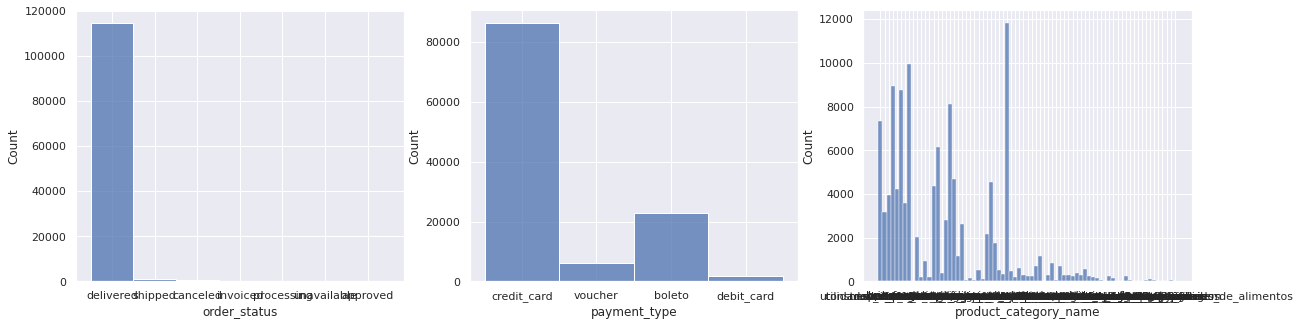

In [ ]:
col = ['order_status','payment_type','product_category_name']

sns.set(rc = {'figure.figsize':(20,5)})
fig, axes = plt.subplots(1, 3)
for i in range(3):
    g=sns.histplot(data=raw, x = col[i],ax=axes[i])

## 지도 시각화
참고 : https://www.kaggle.com/code/andresionek/geospatial-analysis-of-brazilian-e-commerce#Where-does-most-revenue-comes-from?

- zip code 란?  
: 외국의 우편번호  
- zip code prefix 란?  
: 우편번호의 앞자리를 말함. 우편번호의 앞자리는 해당 지역을 대표하는 지역번호이며 일반적으로 특정 도시나 지역의 특정 구역을 식별함.  
예를들어 우리나라에선 5자리의 우편번호가 사용되며, 이 중에서 첫 3자리는 광역시, 도별을 대표하는 지역번호이며 나머지 2자리는 구나 동을 식별하는 구역번호임. 
- 브라질에선 4자리의 zip code prefix를 사용한다.
- 즉, 1자리 -> 4자리로 갈수록 브라질의 지역을 더 자세하게 나타냄

#### 브라질의 모든 zip code prefix 시각화

In [ ]:
geo = pd.read_csv("/content/drive/MyDrive/BOAZ_mini_prj/olist_geolocation_dataset.csv")

In [ ]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# 데이터 세트에 브라질 영역 밖에 있는 일부 이상치 좌표가 있습니다. 
# => 이상치 제거

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo = geo[geo.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo = geo[geo.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo = geo[geo.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo = geo[geo.geolocation_lng <=  -34.79314722]

In [ ]:
# 그런 다음 위도와 경도 좌표를 처리한 다음 Mercator x/y 좌표로 변환합니다.

from datashader.utils import lnglat_to_meters as webm
x, y = webm(geo.geolocation_lng, geo.geolocation_lat)
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)

In [ ]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,x,y
0,1037,-23.545621,-46.639292,sao paulo,SP,-5.191862e+06,-2.698137e+06
1,1046,-23.546081,-46.644820,sao paulo,SP,-5.192478e+06,-2.698193e+06
2,1046,-23.546129,-46.642951,sao paulo,SP,-5.192270e+06,-2.698199e+06
3,1041,-23.544392,-46.639499,sao paulo,SP,-5.191885e+06,-2.697988e+06
4,1035,-23.541578,-46.641607,sao paulo,SP,-5.192120e+06,-2.697646e+06


In [ ]:
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(str)

In [ ]:
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix'].str[0:1]
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix'].str[0:2]
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix'].str[0:3]
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix'].str[0:4]

In [ ]:
# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
brazil = geo
agg_name = 'geolocation_zip_code_prefix'

plot_map(brazil, 'Zip Codes in Brazil', ds.min(agg_name), agg_name, cmap=rainbow)
# 왜 안 나와...

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

In [ ]:
# plot wtih datashader - image with black background
import datashader as ds
from datashader import transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from IPython.core.display import HTML, display
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr

background = "black"
cm = partial(colormap_select, reverse=(background!="black"))
export = partial(export_image, background = background, export_path="export")
display(HTML("<style>.container { width:100% !important; }</style>"))
W = 700 

def create_map(data, cmap, data_agg, export_name='img'):
    pad = (data.x.max() - data.x.min())/50
    x_range, y_range = ((data.x.min() - pad, data.x.max() + pad), 
                             (data.y.min() - pad, data.y.max() + pad))

    ratio = (y_range[1] - y_range[0]) / (x_range[1] - x_range[0])

    plot_width  = int(W)
    plot_height = int(plot_width * ratio)
    if ratio > 1.5:
        plot_height = 550
        plot_width = int(plot_height / ratio)
        
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)

    agg = cvs.points(data, 'x', 'y', data_agg)
    img = tf.shade(agg, cmap=cmap, how='eq_hist')
    return export(img, export_name)

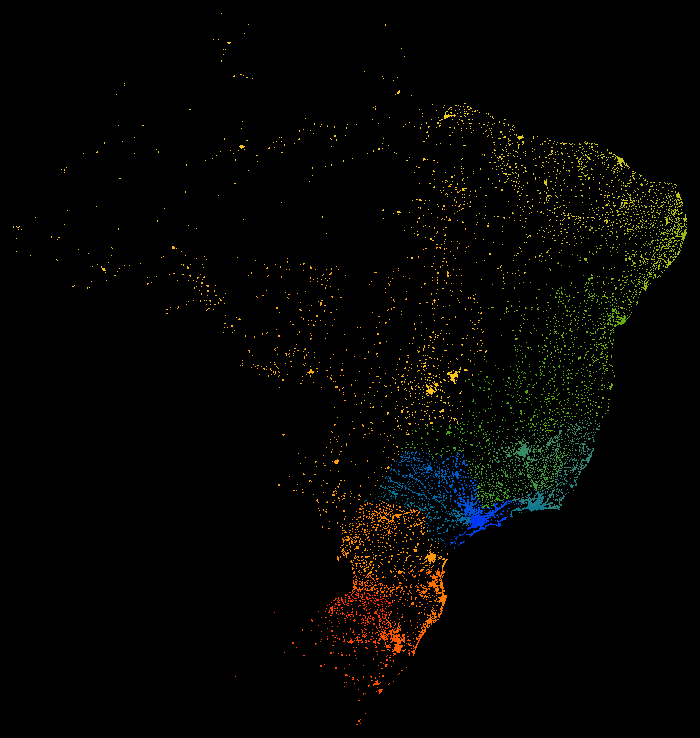

In [ ]:
create_map(brazil, rainbow, ds.mean(agg_name),'brazil_zip_codes')

#### 브라질에서 가장 수입이 많은 곳 (3 digit)

In [ ]:
raw['customer_zip_code_prefix']

0          3149
1          3149
2          3149
3          3366
4          2290
          ...  
117324     8528
117325    89111
117326    60455
117327    39803
117328     9687
Name: customer_zip_code_prefix, Length: 117329, dtype: int64

In [ ]:
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,x,y,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits
0,1037,-23.545621,-46.639292,sao paulo,SP,-5.191862e+06,-2.698137e+06,1,10,103,1037
1,1046,-23.546081,-46.644820,sao paulo,SP,-5.192478e+06,-2.698193e+06,1,10,104,1046
2,1046,-23.546129,-46.642951,sao paulo,SP,-5.192270e+06,-2.698199e+06,1,10,104,1046
3,1041,-23.544392,-46.639499,sao paulo,SP,-5.191885e+06,-2.697988e+06,1,10,104,1041
4,1035,-23.541578,-46.641607,sao paulo,SP,-5.192120e+06,-2.697646e+06,1,10,103,1035
...,...,...,...,...,...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,-5.789805e+06,-3.257630e+06,9,99,999,9995
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,-5.813647e+06,-3.233491e+06,9,99,999,9990
1000160,99950,-28.071855,-52.014716,tapejara,RS,-5.790252e+06,-3.258036e+06,9,99,999,9995
1000161,99980,-28.388932,-51.846871,david canabarro,RS,-5.771567e+06,-3.298098e+06,9,99,999,9998


In [ ]:
raw['customer_zip_code_prefix'] = raw['customer_zip_code_prefix'].astype(str)

In [ ]:
raw['customer_zip_code_prefix_3_digits'] = raw['customer_zip_code_prefix'].str[0:3]
raw['customer_zip_code_prefix_3_digits'] = raw['customer_zip_code_prefix_3_digits'].astype(int)

geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix_3_digits'].astype(int)
brazil_geo = geo.set_index('geolocation_zip_code_prefix_3_digits').copy()

In [ ]:
brazil_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,x,y,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_4_digits
geolocation_zip_code_prefix_3_digits,,,,,,,,,,
103,1037,-23.545621,-46.639292,sao paulo,SP,-5.191862e+06,-2.698137e+06,1,10,1037
104,1046,-23.546081,-46.644820,sao paulo,SP,-5.192478e+06,-2.698193e+06,1,10,1046
104,1046,-23.546129,-46.642951,sao paulo,SP,-5.192270e+06,-2.698199e+06,1,10,1046
104,1041,-23.544392,-46.639499,sao paulo,SP,-5.191885e+06,-2.697988e+06,1,10,1041
103,1035,-23.541578,-46.641607,sao paulo,SP,-5.192120e+06,-2.697646e+06,1,10,1035
...,...,...,...,...,...,...,...,...,...,...
999,99950,-28.068639,-52.010705,tapejara,RS,-5.789805e+06,-3.257630e+06,9,99,9995
999,99900,-27.877125,-52.224882,getulio vargas,RS,-5.813647e+06,-3.233491e+06,9,99,9990
999,99950,-28.071855,-52.014716,tapejara,RS,-5.790252e+06,-3.258036e+06,9,99,9995


In [ ]:
gp = raw.groupby('customer_zip_code_prefix_3_digits')['price'].sum().to_frame()
# 판매한 item 가격의 합산으로 revenue(수익)을 계산함
revenue = brazil_geo.join(gp)
agg_name = 'revenue'
revenue[agg_name] = revenue.price / 1000

In [ ]:
revenue

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,x,y,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_4_digits,price,revenue
100,1009,-23.546935,-46.636588,sao paulo,SP,-5.191561e+06,-2.698297e+06,1,10,1009,3585.82,3.58582
100,1009,-23.545430,-46.635715,sao paulo,SP,-5.191464e+06,-2.698114e+06,1,10,1009,3585.82,3.58582
100,1007,-23.550393,-46.637302,sao paulo,SP,-5.191641e+06,-2.698716e+06,1,10,1007,3585.82,3.58582
100,1005,-23.549819,-46.635606,sao paulo,SP,-5.191452e+06,-2.698647e+06,1,10,1005,3585.82,3.58582
100,1009,-23.545692,-46.635866,sao paulo,SP,-5.191481e+06,-2.698146e+06,1,10,1009,3585.82,3.58582
...,...,...,...,...,...,...,...,...,...,...,...,...
999,99950,-28.068639,-52.010705,tapejara,RS,-5.789805e+06,-3.257630e+06,9,99,9995,8679.49,8.67949
999,99900,-27.877125,-52.224882,getulio vargas,RS,-5.813647e+06,-3.233491e+06,9,99,9990,8679.49,8.67949
999,99950,-28.071855,-52.014716,tapejara,RS,-5.790252e+06,-3.258036e+06,9,99,9995,8679.49,8.67949
999,99980,-28.388932,-51.846871,david canabarro,RS,-5.771567e+06,-3.298098e+06,9,99,9998,8679.49,8.67949


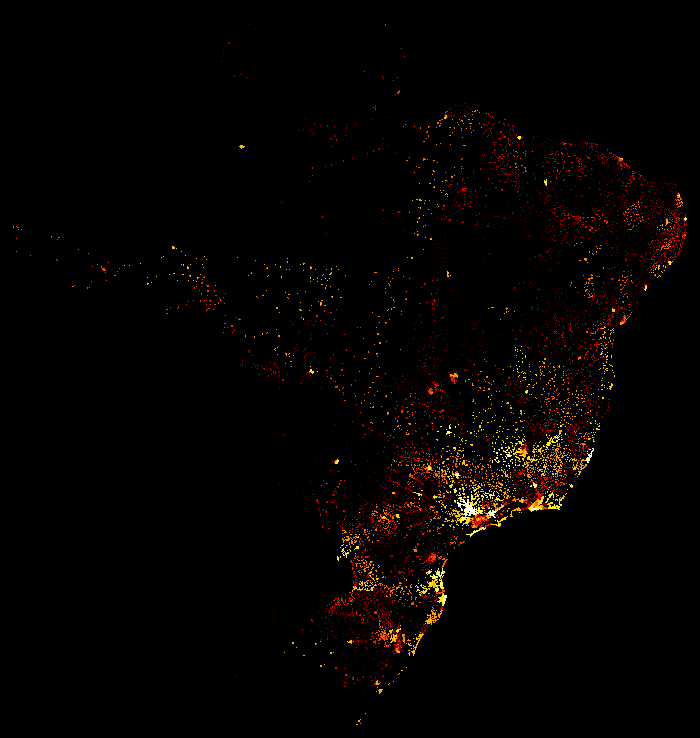

In [ ]:
create_map(revenue, fire, ds.mean(agg_name), 'revenue_brazil')

밝을수록 수입이 높은 것

![brazil](https://user-images.githubusercontent.com/105470134/220111813-88f2abad-8f37-4c9f-af1c-dd3932af907d.jpeg)

브라질의 중심지?? 같은 거같은데 위 수입지표와 일맥상통한 느낌

지도 시각화... 할 수 있는거 더 많을 것 같은데 시간이 없어서 여기까지...^^

## 시계열 그래프 그리기

하려고 했는데 ... 시간이 없어서... 못해쓰요 ...

## 결론

1. 전처리
    - 결측치 처리 : 리뷰 데이터 결측치는 분석에 크게 문제 없을 것 같음. 리뷰는 따로 nlp로 넘어갈거기때문에 다른 모델링에 사용될 데이터들과 독단적으로 사용될 거 가타서..ㅇㅇ 따른 결측치들은 대체하기 보다는 그냥 삭제하는 게 데이터 신뢰성 면에서 나을지도? 어차피 행수도 많고 !!
    - 이상치 처리 : 굳이?? 삭제할 필요 없다고 생각함. iqr로 임의로 정한 개념이고... 그냥 모델링 하다가 튜닝하면서 간 보는게 좋을듯
    - 다중공선성 : price랑 payment_value는 다중공선성의 문제가 충분히 야기될 수 있어서 모델링 시 유의해야할 듯
    - 추가 변수 생성 : 이거까진 시간이 없어서 생각하지 못해씀... ^--^;;
    - 또 머가이쓸까

2. 분석 진행방향 (insight)
    - 이런 비지니스 분석 프레임워크 사용한 프로젝트 해보고 싶었어서 그런거 찾아서 적용해보면 좋을 것 같음.   
    예를들어 3C 분석은 이러함 (우리 데이터에 잘 맞는듯?)  
    <img width="472" alt="스크린샷 2023-02-20 오후 10 14 31" src="https://user-images.githubusercontent.com/105470134/220118779-908588f7-fbb0-446a-891a-a4d74a6f6292.png">   
    참고 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wipsmaster&logNo=50184872603
    - 리뷰로 nlp 감정분석하면 좋을 것 같음 (주제와 상관없을 수 있지만... 내가 해보고싶음)
    - 또 머가이쓸까
